In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm #표준정규분포 불러오기
plt.rcParams['figure.figsize']=(15,10)
plt.rcParams['font.size'] = (19)
plt.rcParams['axes.unicode_minus'] = False
#plt.rcParams['font.family'] = 'LG PC'

## 블랙숄즈 방정식 (무배당이 없고, 무위험 이자율)



$Call_{price} = S_0N(d1) - Ke^{-rT}N(d2)$ <br><br> $Put_{price} = Ke^{-rT}N(-d2)- S_0N(-d1) $<br><br>$d1 = \frac{ln(\frac {S_0} {K}) + (r  + \frac {1}{2} \sigma^2)T}{\sigma \sqrt{T}}$, $d2 = d1 - \sigma \sqrt{T}$

$S_0=Stockprice,  K=Strike, r=risk-free rate, T= Maturity, \sigma= volatility $

In [4]:
def blackscholes(s,k,r,T,sigma):
    
    d1=(np.log(s/k)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    
    call = s*norm.cdf(d1)-k*np.exp(-r*T)*norm.cdf(d2)
    return call

Text(0, 0.5, '$Option price$')

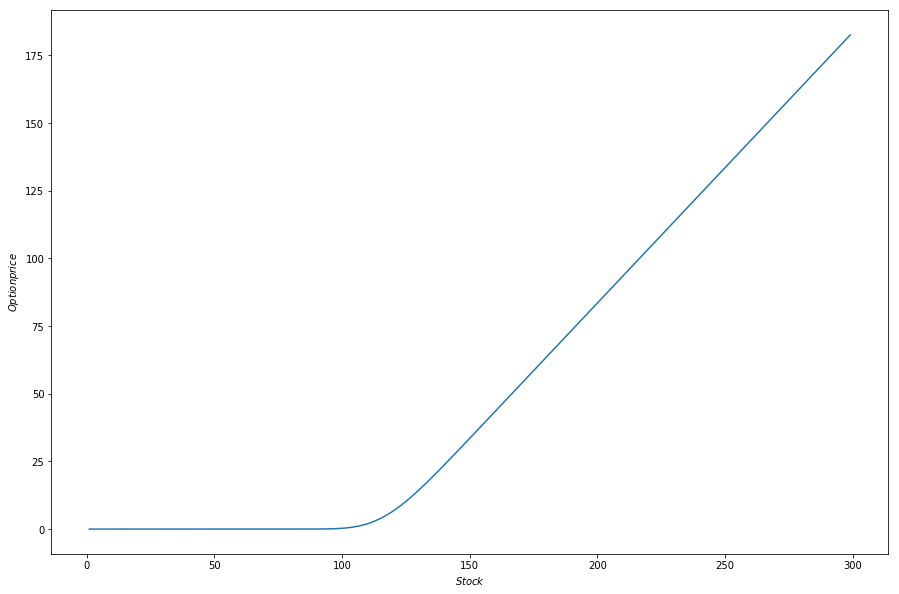

In [40]:
s=np.arange(1,300,1) #주가
k=120 #행사가격
r=0.03 #무위험이자율
T=1 #시간
sigma=0.1 #변동성


plt.plot(s,blackscholes(s,k,r,T,sigma),label='sigma={:.2f}'.format(sigma))
plt.xlabel('$Stock$')
plt.ylabel('$Option price$')

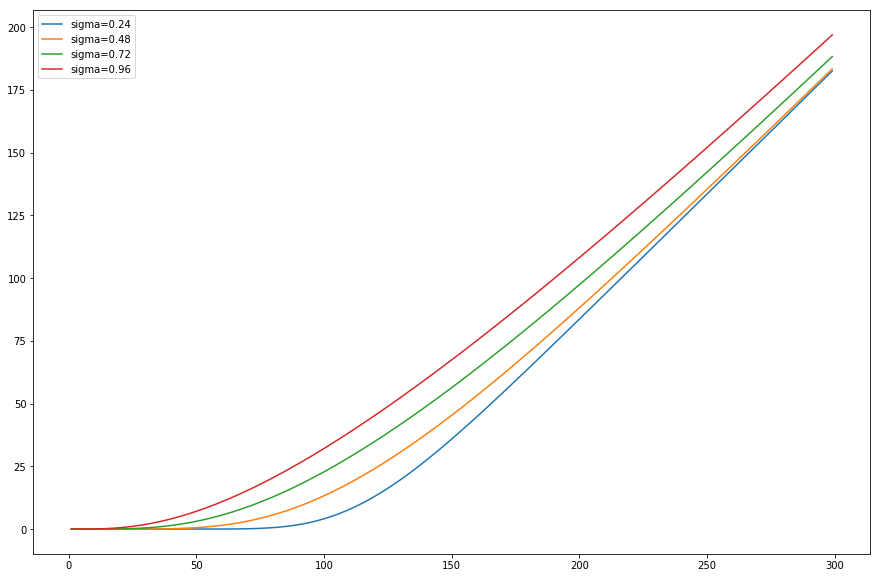

In [30]:
# 변동성에 따른 옵션의 변화
s=np.arange(1,300,1)
k=120
r=0.03
T=1
#sigma=0.4

for i in range(2,9,2):
    sigma = i*0.12
    plt.plot(s,blackscholes(s,k,r,T,sigma),label='sigma={:.2f}'.format(sigma))
    plt.legend()

## 옵션 합성을 통한 새로운 전략 구사 가능

* Call or Put spread
* Straggle 
* Straddle
* Butterfly
* Risk reversal (Collar)

## Greeks 

파생상품 기초자산의 변화에 따른 파생상품 가격의 변화 (미분)

## Delta (기초자산 S의 변화에 따른 파생상품 V의 변화)

In [31]:
def delta(s,k,r,T,sigma):
    
    d1=(np.log(s/k)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    
    delta = norm.cdf(d1)
    return delta

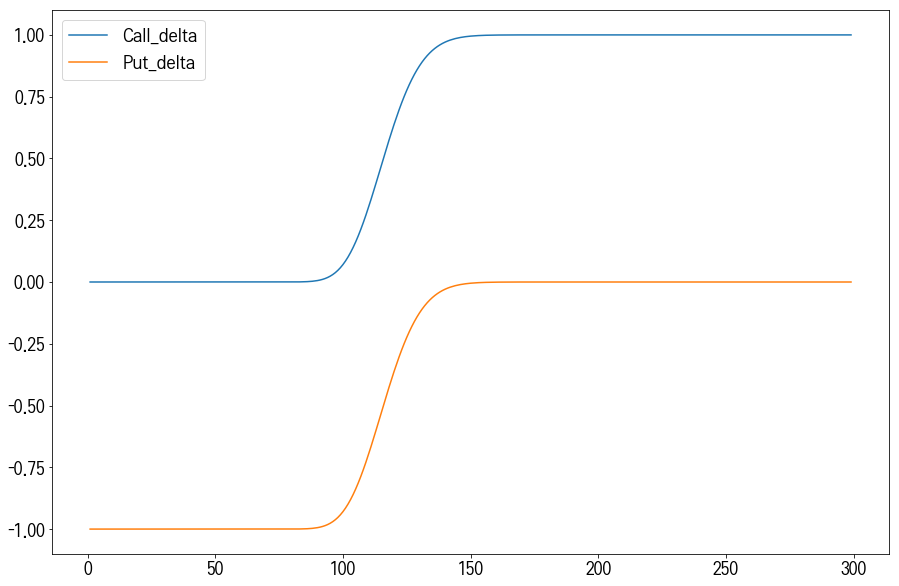

In [52]:

plt.plot(s,delta(s,k,r,T,sigma),label='Call_delta')
plt.plot(s,delta(s,k,r,T,sigma)-1,label='Put_delta')
plt.legend()

## Gamma (기초자산 S의 변화에 따른 Delta의 변화)

In [42]:
def gamma(s,k,r,T,sigma):
    
    d1=(np.log(s/k)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    
    gamma = norm.pdf(d1)/s*sigma*np.sqrt(T)
    return gamma

Text(0, 0.5, 'Call_Gamma')

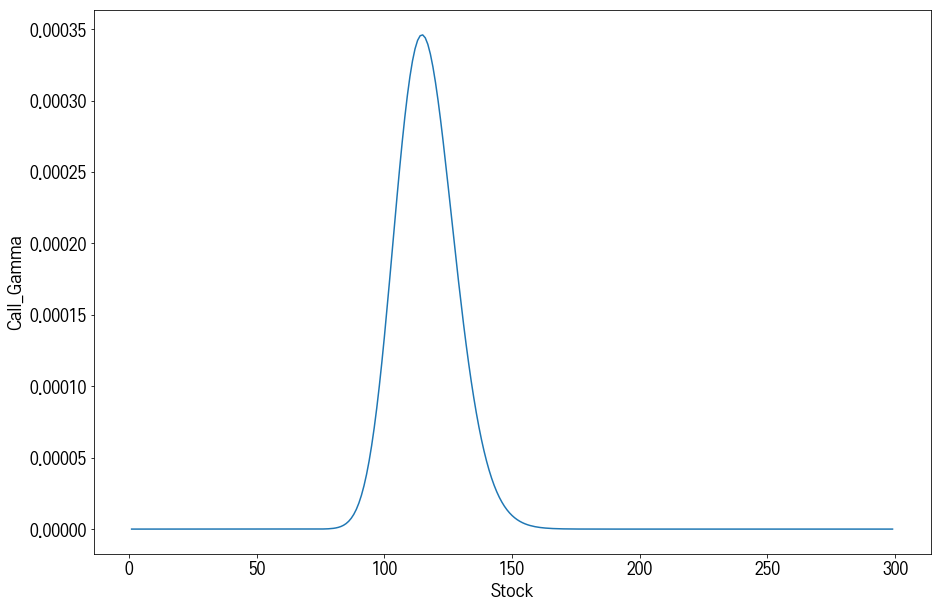

In [49]:
plt.plot(s,gamma(s,k,r,T,sigma))
plt.xlabel('Stock')
plt.ylabel('Call_Gamma')

## Theta ( 시간의 흐름 T에 따른 파생상품 V의 변화)

In [55]:
def theta(s,k,r,T,sigma):
    
    d1=(np.log(s/k)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    
    theta = -s*norm.pdf(d1)*sigma/2*np.sqrt(T)-r*k*np.exp(-r*T)*norm.cdf(d2)
    return theta

Text(0, 0.5, 'Call_theta')

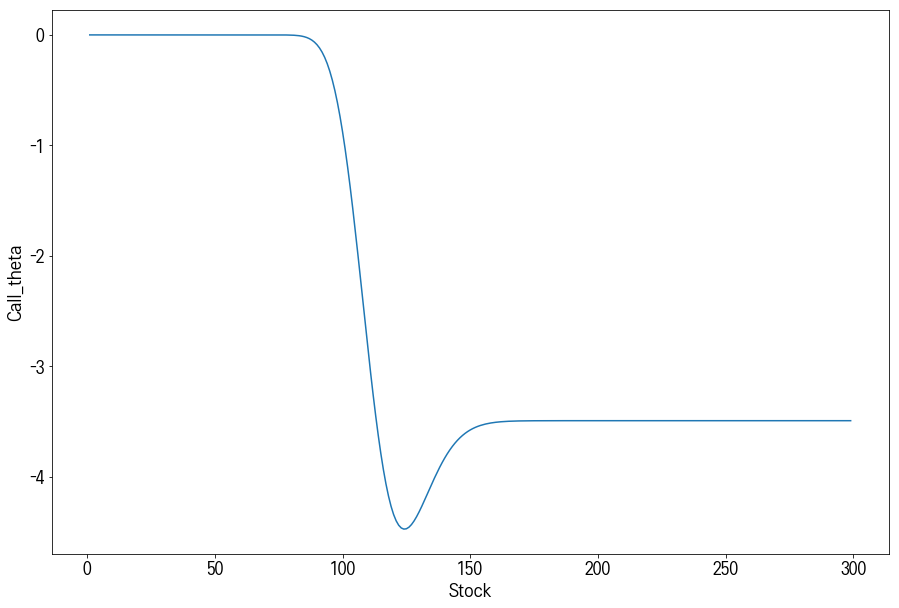

In [56]:
plt.plot(s,theta(s,k,r,T,sigma))
plt.xlabel('Stock')
plt.ylabel('Call_theta')

## Vega (변동성 Sigma의 변화에 따른 파생상품 V의 변화)

In [57]:
def vega(s,k,r,T,sigma):
    
    d1=(np.log(s/k)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    
    vega = s*np.sqrt(T)*norm.pdf(d1)
    return vega

Text(0, 0.5, 'Call_vega')

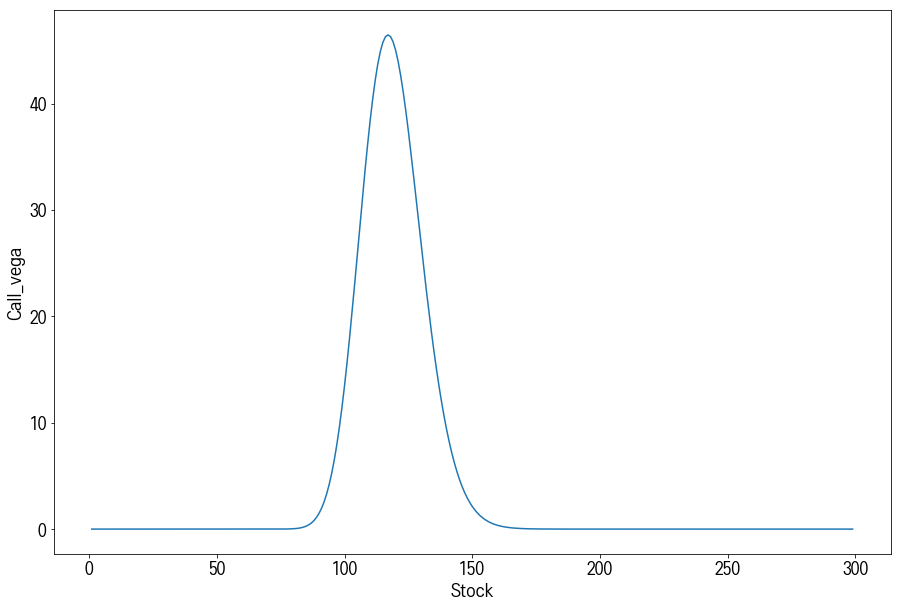

In [58]:
plt.plot(s,vega(s,k,r,T,sigma))
plt.xlabel('Stock')
plt.ylabel('Call_vega')